Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1oSbz7T4PnopI3xVrRBUE5InrAaSIWTlS 

Downloading...
From: https://drive.google.com/uc?id=10ZlkGt6fccwdi5P5Vzrpnx2f_7ht7m8L
To: /content/test.csv
100% 28.6M/28.6M [00:00<00:00, 170MB/s] 


In [ ]:
import tensorflow as tf
import pickle
import pandas as pd
from keras import layers
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np

In [ ]:
# Data should be located in a folder called EMNIST
csv_file = pd.read_csv("train.csv")
test_file = pd.read_csv("test.csv")
# Separate labels from images
labels = csv_file.iloc[:, 0]
labels = csv_file.iloc[:, 0]
for i in range(len(labels)):
    labels[i] = labels[i] - 1
images = csv_file.iloc[:, 1:]

np_images = np.array(images)
np_labels = np.array(labels)

# Normalize the images
np_images = np.divide(np_images, 255.0)
# Convert the 1D array into a 2D one for train and test labels
np_images_2d = np.empty((len(np_images), 28, 28))
for i in range(len(np_images)):
    img_2d = np.reshape(np_images[i], (28, 28))
    img_2d = np.transpose(img_2d)
    np_images_2d[i] = img_2d

test_labels = test_file.iloc[:, 0]
for i in range(len(test_labels)):
    test_labels[i] = test_labels[i] - 1
test_images = test_file.iloc[:, 1:]

np_test_images = np.array(test_images)
np_test_labels = np.array(test_labels)

np_test_images = np.divide(np_test_images, 255.0)

np_test_images_2d = np.empty((len(test_images), 28, 28))
for i in range(len(np_test_images)):
    img_2d = np.reshape(np_test_images[i], (28, 28))
    img_2d = np.transpose(img_2d)
    np_test_images_2d[i] = img_2d


In [ ]:
n_classes = 26
# One hot encode the labels
np_labels = np.zeros((len(labels), 26))
for i in range(len(labels)):
    np_labels[i][labels[i]] = 1
print (len(np_labels))
print (len(np_test_labels))

# One hot encode test labels
np_test_labels = np.zeros((len(test_labels), 26))
for i in range(len(test_labels)):
    np_test_labels[i][test_labels[i]] = 1
print (np_test_labels)

88799
14799
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


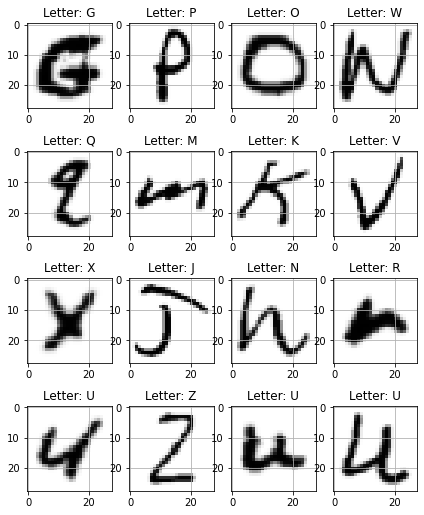

In [ ]:
# Show a couple of train images in order to test 
predicted_classes = np_labels[0:16]
predictions = np.zeros(16)
for i, predict in enumerate(predicted_classes):
    predictions[i] = np.argmax(predict)

fig, axes = plt.subplots(4,4, figsize=(7,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    ax.imshow(np_images_2d[i], cmap="Greys")
    pred = chr(int(predictions[i])+65)
    ax.set_title("Letter: "+ pred)
    ax.grid()

In [ ]:
# Create the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28,28, 1)),
    layers.MaxPool2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPool2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(128, (3, 3), activation="relu", padding="valid"),
    layers.MaxPool2D(pool_size=(2, 2), strides=2),
    layers.Flatten(),
    layersnse(64, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(26, activation=tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
model.fit(np_images_2d, np_labels, epochs=7, validation_split=0.2)

Epoch 1/7
2220/2220 [==============================] - 31s 9ms/step - loss: 0.5385 - accuracy: 0.8292 - val_loss: 0.3129 - val_accuracy: 0.8984
Epoch 2/7
2220/2220 [==============================] - 19s 9ms/step - loss: 0.2397 - accuracy: 0.9182 - val_loss: 0.2292 - val_accuracy: 0.9260
Epoch 3/7
2220/2220 [==============================] - 20s 9ms/step - loss: 0.1962 - accuracy: 0.9314 - val_loss: 0.2066 - val_accuracy: 0.9337
Epoch 4/7
2220/2220 [==============================] - 20s 9ms/step - loss: 0.1694 - accuracy: 0.9387 - val_loss: 0.2075 - val_accuracy: 0.9345
Epoch 5/7
2220/2220 [==============================] - 21s 9ms/step - loss: 0.1512 - accuracy: 0.9449 - val_loss: 0.2152 - val_accuracy: 0.9349
Epoch 6/7
2220/2220 [==============================] - 22s 10ms/step - loss: 0.1368 - accuracy: 0.9491 - val_loss: 0.2044 - val_accuracy: 0.9351
Epoch 7/7
2220/2220 [==============================] - 20s 9ms/step - loss: 0.1235 - accuracy: 0.9533 - val_loss: 0.2366 - val_accuracy

In [ ]:
# Save the model on the mounted drive folder
model.save("/content/drive/My Drive/EMNIST/model.h5")
model.save("model.h5")

In [ ]:
# Test the model on the test dataset
metrics = model.evaluate(np_test_images_2d, np_test_labels, verbose=2)

463/463 - 2s - loss: 0.2580 - accuracy: 0.9156 - 2s/epoch - 5ms/step


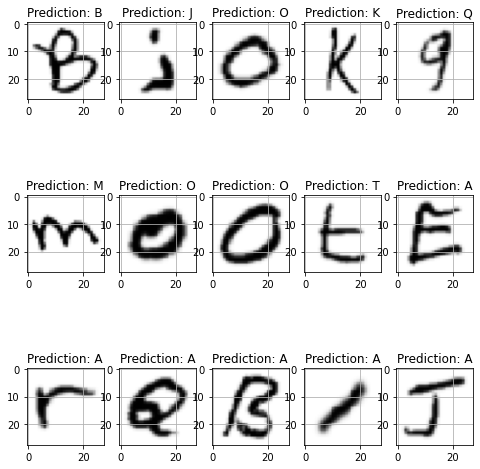

In [ ]:
shuffled = np_test_images_2d.copy()
np.random.shuffle(shuffled)
predicted_classes = model.predict(shuffled[0:9])
predictions = np.zeros(15)
for i, predict in enumerate(predicted_classes):
    predictions[i] = np.argmax(predict)

fig, axes = plt.subplots(3,5, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(shuffled[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = chr(int(predictions[i])+65)
    ax.set_title("Prediction: "+ pred)
    ax.grid()

[[7.4980180e-06 8.8832508e-10 9.9978167e-01 5.7543328e-08 1.2594314e-04
  1.0886058e-06 3.7610182e-06 8.6183538e-10 2.3606808e-05 2.9925673e-07
  6.9149353e-09 4.6240075e-05 3.6401168e-08 3.7788506e-10 3.1281857e-06
  1.1401460e-07 4.9023623e-07 1.6449674e-06 7.7797961e-07 9.3456964e-07
  1.1695710e-06 5.3595397e-07 5.3702099e-08 1.4121097e-10 5.9709305e-07
  4.7884157e-07]]


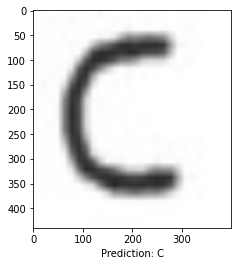

In [ ]:
# Custom images test
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread(r'/content/drive/My Drive/EMNIST/C.jpg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

img_final = cv2.resize(img_gray, (28,28))
img_final = np.subtract(255, img_final)
img_final = np.divide(img_final, 255)
img_final = np.reshape(img_final, (1,28,28,1))


print(model.predict(img_final))
img_pred = chr(np.argmax(model.predict(img_final))+65)

plt.imshow(img, cmap="Greys")
plt.xlabel("Prediction: "+ img_pred)
plt.show()
